# Mounting Drive

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
cd drive/'My Drive'/'Colab Notebooks'/'Emotion Speech Recognition'/

/content/drive/My Drive/Colab Notebooks/Emotion Speech Recognition


In [4]:
!ls

Dataset		    main_speech_emotion_recognition.ipynb
dataset_attr.csv    model.json
demo_audio2.wav     Others
demo_audio4.wav     Predictions.csv
demo_audio5.wav     Predictions.xlsx
demo_audio.wav	    speech_emotion_recognition.ipynb
features_dataframe  Trained_Models
images		    utils
img_data


In [5]:
# Check Python version
import sys
print(sys.version)

# Install libraries
!pip install librosa
!pip install torch torchvision torchaudio
!pip install keras

# Verify GPU availability
import torch
print(torch.cuda.is_available())  # True if GPU is available


3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12

In [6]:
# Verify GPU availability
import torch
print(torch.cuda.is_available())  # True if GPU is available

True


#  Installation of Dependencies



Essential requirement of of our project :
1. **Python 3.7**
2. **Librosa**
3. **PyTorch**
4. **Keras**
5. **GPU**

We have Already installed this frameworks and packages.

In [7]:
# Provides a way of using operating system dependent functionality.
import os

# LibROSA provides the audio analysis
import librosa
# Need to implictly import from librosa
import librosa.display

# Import the audio playback widget
import IPython.display as ipd
from IPython.display import Image

# Enable plot in the notebook
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt

# These are generally useful to have around
import numpy as np
import pandas as pd


# To build Neural Network and Create desired Model
import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D #, AveragePooling1D
from keras.layers import Flatten, Dropout, Activation # Input,
from keras.layers import Dense #, Embedding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


# 3. Data Preparation


### Plotting the audio file's waveform and its spectrogram

In [8]:
data, sampling_rate = librosa.load('Dataset/anger/anger016.wav')
# To play audio this in the jupyter notebook
ipd.Audio('Dataset/anger/anger016.wav')

In [9]:
!ls

Dataset		    main_speech_emotion_recognition.ipynb
dataset_attr.csv    model.json
demo_audio2.wav     Others
demo_audio4.wav     Predictions.csv
demo_audio5.wav     Predictions.xlsx
demo_audio.wav	    speech_emotion_recognition.ipynb
features_dataframe  Trained_Models
images		    utils
img_data


In [10]:
len(data)

87553

In [11]:
sampling_rate

22050

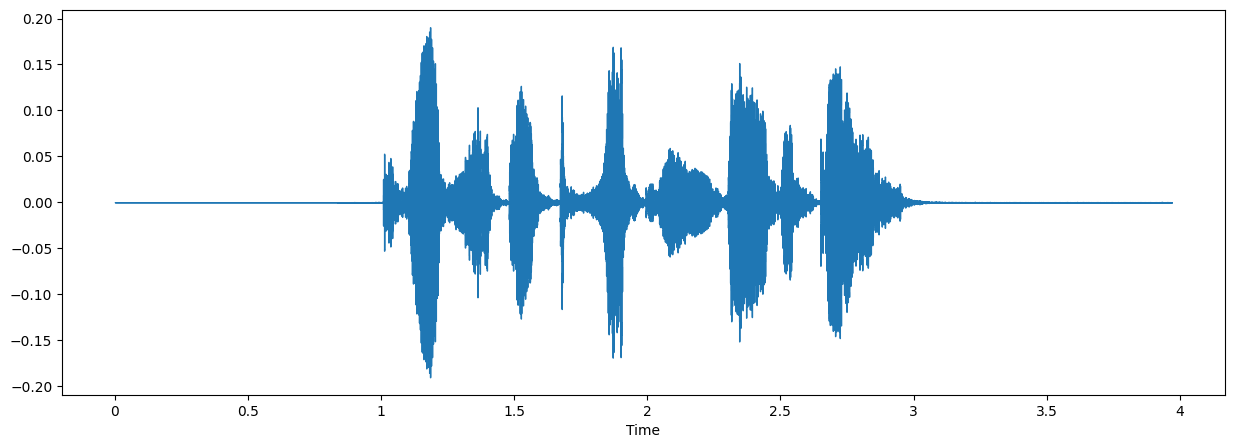

In [12]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

### Setup the Basic Paramter

In [14]:
dataset_path = os.path.abspath('./Dataset')
destination_path = os.path.abspath('./')
# To shuffle the dataset instances/records
randomize = True
# for spliting dataset into training and testing dataset
split = 0.8
# Number of sample per second e.g. 16KHz
sampling_rate = 20000
emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]

### Converting Dataset in CSV format

it will cause easy operation on Dataset.

In [15]:
dataset_path = os.path.abspath('./Dataset')
destination_path = os.path.abspath('./')
# To shuffle the dataset instances/records
randomize = True
# for spliting dataset into training and testing dataset
split = 0.8
# Number of sample per second e.g. 16KHz
sampling_rate = 20000
emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]

In [ ]:
!ls

Dataset		  features_dataframe			 Predictions.csv
dataset_attr.csv  images				 Predictions.xlsx
demo_audio2.wav   img_data				 speech_emotion_recognition.ipynb
demo_audio4.wav   main_speech_emotion_recognition.ipynb  Trained_Models
demo_audio5.wav   model.json				 utils
demo_audio.wav	  Others


In [16]:
# import required libraries
import os
import sys
import csv
import librosa
import numpy as np
import pandas as pd
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
np.random.seed(42)

def create_meta_csv(dataset_path, destination_path):
    """Create a meta csv file given a dataset folder path of Audio.

    This function creates and saves a meta csv file named 'dataset_attr.csv' given a dataset folder path of audios.
    The file will contain audios and their labels. This file can be then used to make
    train, test and val splits, randomize them and load few of them (a mini-batch) in memory
    as required. The file is saved in dataset_path folder if destination_path is not provided.

    Args:
        dataset_path (str): Path to dataset folder
        destination_path (str): Destination to store meta file if None provided, it'll store file in dataset_path
    Returns:
        True (bool): Returns True if 'dataset_attr.csv' was created successfully else returns an exception
    """
    # Change dataset path accordingly
    DATASET_PATH = os.path.abspath(dataset_path)
    csv_path=os.path.join(destination_path, 'dataset_attr.csv')
    flist = []
    emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
    for root, dirs, files in os.walk(DATASET_PATH, topdown=False):
        for name in files:
            if (name.endswith('.wav')):
                fullName = os.path.join(root, name)
                flist.append(fullName)

    split_format = str('/') if sys.platform=='linux' else str('\\')

    filenames=[]
    for idx,file in enumerate(flist):
        filenames.append(file.split(split_format))
        # print(filenames[idx])
    types=[]
    for idx,path in enumerate(filenames):
        types.append((flist[idx],emotions.index(path[-2]))) ##second last location has emotion name

    with open(csv_path, 'w') as f:
        writer = csv.writer(f)
        writer.writerows([("path","label")])
        writer.writerows(types)
    f.close()
    # change destination_path to DATASET_PATH if destination_path is None
    if destination_path == None:
        destination_path = DATASET_PATH
        # write out as dataset_attr.csv in destination_path directory
        # if no error
    return True

def create_and_load_meta_csv_df(dataset_path, destination_path, randomize=True, split=None):
    """Create a meta csv file given a dataset folder path of audios and loads it as a pandas dataframe.
    This function creates and saves a meta csv file named 'dataset_attr.csv' given a dataset folder path of audios.
    The function will return pandas dataframes for the csv and also train and test splits if you specify a
    fraction in split parameter.

    Args:
        dataset_path (str): Path to dataset folder
        destination_path (str): Destination to store meta csv file
        randomize (bool, optional): Randomize the csv records. Defaults to True
        split (double, optional): Percentage of train records. Defaults to None
    Returns:
        dframe (pandas.Dataframe): Returns a single Dataframe for csv if split is none, else returns more two Dataframes for train and test splits.
        train_set (pandas.Dataframe): Returns a Dataframe of length (split) * len(dframe)
        test_set (pandas.Dataframe): Returns a Dataframe of length (1 - split) * len(dframe)
    """
    if create_meta_csv(dataset_path, destination_path=destination_path):
        dframe = pd.read_csv(os.path.join(destination_path, 'dataset_attr.csv'))

    # shuffle if randomize is True or if split specified and randomize is not specified
    # so default behavior is split
    if randomize == True or (split != None and randomize == None):
        # shuffle the dataframe here
        dframe=dframe.sample(frac=1).reset_index(drop=True)
        pass

    if split != None:
        train_set, test_set = train_test_split(dframe, split)
        return dframe, train_set, test_set

    return dframe

In [17]:
def train_test_split(dframe, split_ratio):
    """Splits the dataframe into train and test subset dataframes.
    Args:
        split_ration (float): Divides dframe into two splits.
    Returns:
        train_data (pandas.Dataframe): Returns a Dataframe of length (split_ratio) * len(dframe)
        test_data (pandas.Dataframe): Returns a Dataframe of length (1 - split_ratio) * len(dframe)
    """
    # divide into train and test dataframes
    train_data= dframe.iloc[:int((split_ratio) * len(dframe)), :]
    test_data= dframe.iloc[int((split_ratio) * len(dframe)):,:]
    test_data=test_data.reset_index(drop=True) #reset index for test data
    return train_data, test_data

In [18]:
# loading dataframes using dataset module


# To know more about "create_and_load_meta_csv_df" function and it's working, go to "./utils/dataset.py" script.
df, train_df, test_df = create_and_load_meta_csv_df(dataset_path, destination_path, randomize, split)

In [19]:
print('Dataset samples  : ', len(df),"\nTraining Samples : ", len(train_df),"\ntesting Samples  : ", len(test_df))

Dataset samples  :  2571 
Training Samples :  2056 
testing Samples  :  515


# 4. Data Visualization

Let's understand what is our dataset.

In [20]:
df.head()

,path,label
0,/content/drive/MyDrive/Colab Notebooks/Emotion...,5
1,/content/drive/MyDrive/Colab Notebooks/Emotion...,1
2,/content/drive/MyDrive/Colab Notebooks/Emotion...,4
3,/content/drive/MyDrive/Colab Notebooks/Emotion...,2
4,/content/drive/MyDrive/Colab Notebooks/Emotion...,3


In [21]:
print("Actual Audio : ", df['path'][0])
print("Labels       : ", df['label'][0])


Actual Audio :  /content/drive/MyDrive/Colab Notebooks/Emotion Speech Recognition/Dataset/sad/sad027.wav
Labels       :  5



### Labels Assigned for emotions :
- 0 : anger
- 1 : disgust
- 2 : fear
- 3 : happy
- 4 : neutral
- 5 : sad
- 6 : surprise


In [22]:
unique_labels = train_df.label.unique()
unique_labels.sort()
print("unique labels in Emtion dataset : ")
print(*unique_labels, sep=', ')
unique_labels_counts = train_df.label.value_counts(sort=False)
print("\n\nCount of unique labels in Emtion dataset : ")
print(*unique_labels_counts,sep=', ')

unique labels in Emtion dataset : 
0, 1, 2, 3, 4, 5, 6


Count of unique labels in Emtion dataset : 
345, 214, 239, 367, 346, 200, 345


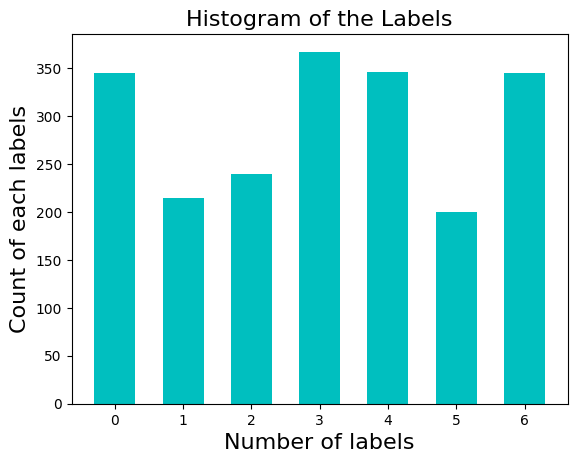

In [23]:
# Histogram of the classes
plt.bar(unique_labels, unique_labels_counts,align = 'center', width=0.6, color = 'c')
plt.xlabel('Number of labels', fontsize=16)
plt.xticks(unique_labels)
plt.ylabel('Count of each labels', fontsize=16)
plt.title('Histogram of the Labels', fontsize=16)
plt.show()

# 5. Data Pre-Processing

### Getting the features of audio files using librosa

Calculating MFCC, Pitch, magnitude, Chroma features.

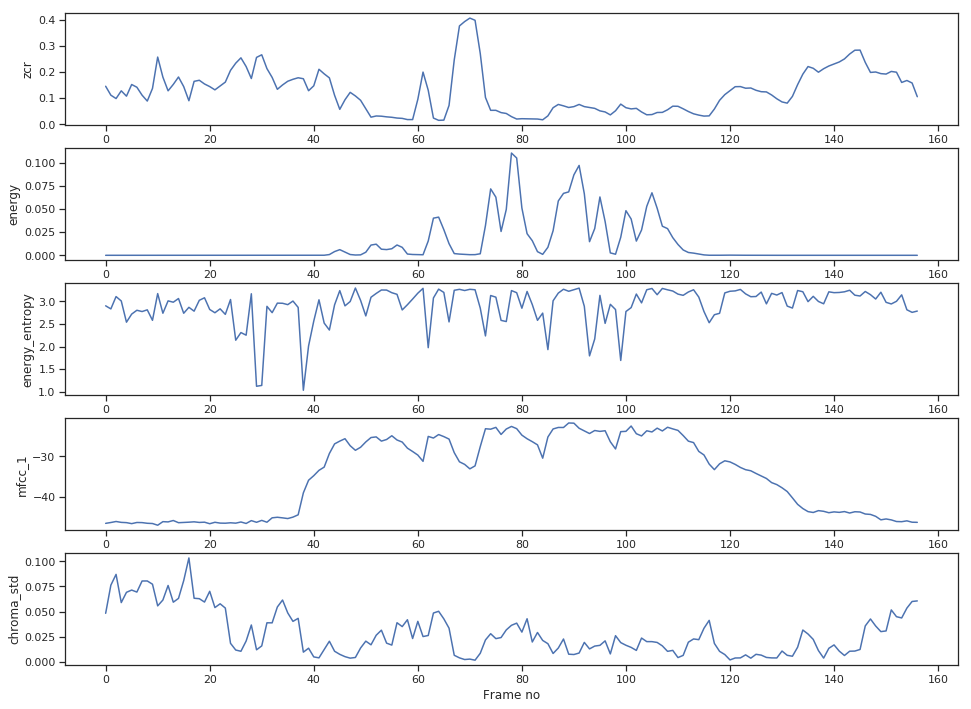

In [24]:
from IPython.display import Image

# Correct usage
Image(filename='./images/feature_plots.png')


In [ ]:
!ls

Dataset		  features_dataframe			 Predictions.csv
dataset_attr.csv  images				 Predictions.xlsx
demo_audio2.wav   img_data				 speech_emotion_recognition.ipynb
demo_audio4.wav   main_speech_emotion_recognition.ipynb  Trained_Models
demo_audio5.wav   model.json				 utils
demo_audio.wav	  Others


In [25]:
from utils.feature_extraction import get_features_dataframe
from utils.feature_extraction import get_audio_features

In [26]:
def get_audio_features(audio_path,sampling_rate):
    X, sample_rate = librosa.load(audio_path ,res_type='kaiser_fast',duration=2.5,sr=sampling_rate*2,offset=0.5)
    sample_rate = np.array(sample_rate)

    y_harmonic, y_percussive = librosa.effects.hpss(X)
    pitches, magnitudes = librosa.core.pitch.piptrack(y=X, sr=sample_rate)

    mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=1)

    pitches = np.trim_zeros(np.mean(pitches,axis=1))[:20]

    magnitudes = np.trim_zeros(np.mean(magnitudes,axis=1))[:20]

    C = np.mean(librosa.feature.chroma_cqt(y=y_harmonic, sr=sampling_rate),axis=1)

    return [mfccs, pitches, magnitudes, C]



def get_features_dataframe(dataframe, sampling_rate):
    labels = pd.DataFrame(dataframe['label'])

    features  = pd.DataFrame(columns=['mfcc','pitches','magnitudes','C'])
    for index, audio_path in enumerate(dataframe['path']):
        features.loc[index] = get_audio_features(audio_path, sampling_rate)

    mfcc = features.mfcc.apply(pd.Series)
    pit = features.pitches.apply(pd.Series)
    mag = features.magnitudes.apply(pd.Series)
    C = features.C.apply(pd.Series)

    combined_features = pd.concat([mfcc,pit,mag,C],axis=1,ignore_index=True)

    return combined_features, labels

To know more about "get_features_dataframe" and "get_audio_features" functions and their working, go to "./utils/feature_extraction.py" script.

In [27]:

#trainfeatures, trainlabel = get_features_dataframe(train_df, sampling_rate)
#testfeatures, testlabel = get_features_dataframe(test_df, sampling_rate)

# I have ran above 2 lines and get the featured dataframe.
# and store it into pickle file to use it for later purpose.
# it take too much time to generate features(around 30-40 minutes).

trainfeatures = pd.read_pickle('./features_dataframe/trainfeatures')
trainlabel = pd.read_pickle('./features_dataframe/trainlabel')
testfeatures = pd.read_pickle('./features_dataframe/testfeatures')
testlabel = pd.read_pickle('./features_dataframe/testlabel')

In [28]:
trainfeatures.shape

(2044, 65)

In [29]:
trainfeatures = trainfeatures.fillna(0)
testfeatures = testfeatures.fillna(0)

In [30]:
# By using .ravel() : Converting 2D to 1D e.g. (512,1) -> (512,). To prevent DataConversionWarning

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel).ravel()
X_test = np.array(testfeatures)
y_test = np.array(testlabel).ravel()


In [31]:
y_train[:5]

array([3, 2, 2, 0, 3])

In [32]:
from tensorflow.keras.utils import to_categorical

# One-Hot Encoding
lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))


In [33]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

### Changing dimension for CNN model

In [34]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [35]:
x_traincnn.shape

(2044, 65, 1)

# 6. Model Creation

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Activation, Input
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

# Use Input layer for the first layer
model.add(Input(shape=(x_traincnn.shape[1], x_traincnn.shape[2])))

model.add(Conv1D(256, 5, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=8))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))

# Use the updated way to define RMSprop
opt = RMSprop(learning_rate=0.00001, decay=1e-6)

# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 65, 256)        │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 65, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 65, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 65, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 65, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 8, 128)         │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 8, 128)         │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │         7,175 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 336,775 (1.28 MB)

 Trainable params: 336,775 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

# 7. Training and Evaluation

### Removed the whole training part for avoiding unnecessary long epochs list

In [40]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=370, validation_data=(x_testcnn, y_test))

Epoch 1/370


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-39-98bf2e63ac1d>", line 1, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_1573]

### Loss Vs Iterations

In [41]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'cnnhistory' is not defined

### Saving the model

In [42]:
model_name = 'model0.h5'
save_dir = os.path.join(os.getcwd(), 'Trained_Models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/MyDrive/Colab Notebooks/Emotion Speech Recognition/Trained_Models/model0.h5 


In [43]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Loading the model

In [44]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("./Trained_Models/model0.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-44-0bc78d5c16e9>", line 13, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 484, in evaluate

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_2360]

# 8. Test Set Prediction

### Predicting emotions on the test data

In [45]:
preds = loaded_model.predict(x_testcnn,
                         batch_size=32,
                         verbose=1)

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-45-ba3282eb00bb>", line 1, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_data_distributed_2508]

In [46]:
x_testcnn.shape

(512, 65, 1)

In [47]:
preds

NameError: name 'preds' is not defined

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

array([2, 3, 1, 3, 3, 0, 3, 5, 3, 5, 2, 2, 0, 4, 4, 3, 0, 5, 4, 5, 2, 6,
       3, 4, 0, 3, 0, 3, 3, 3, 3, 4, 5, 3, 0, 3, 2, 3, 2, 3, 5, 6, 4, 0,
       5, 1, 1, 5, 1, 5, 1, 3, 2, 5, 4, 5, 2, 2, 6, 4, 4, 3, 2, 0, 0, 3,
       5, 0, 0, 3, 3, 2, 6, 2, 4, 5, 5, 6, 0, 1, 5, 0, 0, 2, 3, 3, 6, 0,
       2, 0, 3, 0, 4, 2, 2, 3, 6, 5, 4, 2, 2, 4, 3, 4, 3, 3, 2, 3, 3, 3,
       2, 3, 0, 3, 4, 5, 2, 2, 2, 0, 5, 3, 6, 3, 0, 3, 2, 2, 5, 0, 5, 2,
       1, 3, 4, 0, 3, 0, 1, 4, 0, 0, 1, 2, 0, 0, 1, 5, 4, 2, 5, 0, 4, 0,
       5, 5, 1, 2, 6, 5, 0, 5, 5, 5, 0, 3, 4, 4, 6, 6, 6, 5, 1, 3, 1, 1,
       2, 0, 5, 5, 0, 0, 4, 5, 2, 2, 2, 2, 1, 0, 3, 0, 2, 4, 4, 5, 0, 6,
       2, 0, 0, 2, 4, 4, 6, 3, 4, 2, 0, 4, 3, 3, 2, 2, 4, 4, 4, 6, 3, 4,
       5, 0, 0, 3, 4, 4, 0, 5, 3, 3, 5, 4, 4, 4, 0, 3, 4, 5, 1, 3, 6, 5,
       5, 2, 4, 5, 5, 2, 1, 0, 0, 4, 2, 5, 0, 1, 1, 1, 3, 4, 3, 2, 4, 4,
       2, 6, 5, 1, 2, 2, 5, 4, 2, 1, 4, 3, 2, 3, 0, 0, 2, 2, 5, 0, 3, 5,
       3, 4, 5, 3, 5, 3, 4, 5, 4, 0, 0, 5, 4, 0, 5,

In [ ]:
abc = preds1.astype(int).flatten()

In [48]:
predictions = (lb.inverse_transform((abc)))

NameError: name 'abc' is not defined

In [49]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

NameError: name 'predictions' is not defined

In [50]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [51]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,2
1,0
2,1
3,2
4,3
5,6
6,6
7,5
8,3
9,5


In [52]:
finaldf = actualdf.join(preddf)

NameError: name 'preddf' is not defined

## Actual v/s Predicted emotions

In [53]:
finaldf[130:140]

NameError: name 'finaldf' is not defined

In [54]:
finaldf.groupby('actualvalues').count()

NameError: name 'finaldf' is not defined

In [55]:
finaldf.groupby('predictedvalues').count()

NameError: name 'finaldf' is not defined

In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

# 9. Live Demonstration

In [56]:
demo_audio_path = './Dataset/sad/sad001.wav'
ipd.Audio('./Dataset/sad/sad001.wav')

In [57]:
!pip uninstall -y librosa
!pip uninstall -y resampy
!pip install librosa

!pip install resampy

Found existing installation: librosa 0.11.0
Uninstalling librosa-0.11.0:
  Successfully uninstalled librosa-0.11.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 8.6 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.1 MB/s eta 0:00:00


In [1]:
!pip install resampy



In [2]:
import librosa

import resampy

In [3]:
demo_mfcc, demo_pitch, demo_mag, demo_chrom = get_audio_features(demo_audio_path,sampling_rate)

mfcc = pd.Series(demo_mfcc)
pit = pd.Series(demo_pitch)
mag = pd.Series(demo_mag)
C = pd.Series(demo_chrom)
demo_audio_features = pd.concat([mfcc,pit,mag,C],ignore_index=True)

NameError: name 'get_audio_features' is not defined

In [4]:
import numpy as np
import librosa
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load Trained Model
model = load_model("./Trained_Models/model0.h5")
print(f"✅ Model loaded successfully. Expected input shape: {model.input_shape}")

# Emotion Labels (Ensure this matches your dataset labels)
labels = ["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]

def get_audio_features(audio_path,sampling_rate):
    X, sample_rate = librosa.load(audio_path ,res_type='kaiser_fast',duration=2.5,sr=sampling_rate*2,offset=0.5)
    sample_rate = np.array(sample_rate)

    y_harmonic, y_percussive = librosa.effects.hpss(X)
    pitches, magnitudes = librosa.core.pitch.piptrack(y=X, sr=sample_rate)

    mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=1)

    pitches = np.trim_zeros(np.mean(pitches,axis=1))[:20]

    magnitudes = np.trim_zeros(np.mean(magnitudes,axis=1))[:20]

    C = np.mean(librosa.feature.chroma_cqt(y=y_harmonic, sr=sampling_rate),axis=1)

    return [mfccs, pitches, magnitudes, C]

file_path = './Dataset/sad/sad001.wav'
features = get_audio_features(file_path,sampling_rate)

# Debugging: Print Feature Shape
print(f"🔍 Extracted feature shape: {features.shape}")

# Make Prediction
prediction = loaded_model.predict(features)
predicted_label = labels[np.argmax(prediction)]

# Output the Result
print(f"🎙️ Predicted Emotion: {predicted_label}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './Trained_Models/model0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
demo_audio_features= np.expand_dims(demo_audio_features, axis=0)
demo_audio_features= np.expand_dims(demo_audio_features, axis=2)

NameError: name 'demo_audio_features' is not defined

In [6]:
demo_audio_features.shape

NameError: name 'demo_audio_features' is not defined

In [ ]:
livepreds = loaded_model.predict(demo_audio_features,
                         batch_size=32,
                         verbose=1)

1/1 [==============================] - 0s 8ms/step


In [7]:
livepreds

NameError: name 'livepreds' is not defined

In [8]:
# emotions=["anger","disgust","fear","happy","neutral", "sad", "surprise"]
index = livepreds.argmax(axis=1).item()
index

NameError: name 'livepreds' is not defined

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame()

In [11]:
df.head(3)

""


In [12]:
emotions[index]

NameError: name 'emotions' is not defined

In [13]:
pip install numpy librosa tensorflow keras soundfile


In [14]:
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import soundfile as sf
import os


labels = ["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]
model = load_model("./Trained_Models/model0.h5")
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load audio
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Extract MFCC features
    mfccs_scaled = np.mean(mfccs.T, axis=0)  # Take mean across time axis
    return np.expand_dims(mfccs_scaled, axis=0)  # Reshape for model

file_path = "demo_audio.wav"
features = extract_features(file_path)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './Trained_Models/model0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [15]:
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import load_model
import soundfile as sf

# Load Trained Model
model = load_model("./Trained_Models/model0.h5")

# Emotion Labels (Ensure this matches your dataset labels)
labels = ["neutral", "calm", "happy", "sad", "angry", "fearful", "disgust", "surprised"]

# Function to Extract Features (Ensure it produces 1024 features)
def extract_features(file_path, target_shape=1024):
    y, sr = librosa.load(file_path, sr=None)  # Load audio file
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Extract 40 MFCCs
    mfccs_scaled = np.mean(mfccs.T, axis=0)  # Take mean over time

    # Ensure feature size matches the model input (1, 1024)
    if len(mfccs_scaled) < target_shape:
        mfccs_padded = np.pad(mfccs_scaled, (0, target_shape - len(mfccs_scaled)))  # Pad with zeros
    else:
        mfccs_padded = mfccs_scaled[:target_shape]  # Trim if too long

    return np.expand_dims(mfccs_padded, axis=0)  # Reshape to (1, 1024)

# Load and Process the Demo Audio
file_path = "demo_audio.wav"
features = extract_features(file_path)

# Make Prediction
prediction = loaded_model.predict(features)
predicted_label = labels[np.argmax(prediction)]

# Output the Result
print(f"Predicted Emotion: {predicted_label}")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './Trained_Models/model0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)